In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
picks = pd.read_csv('1_Pre-processed data.csv')
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()

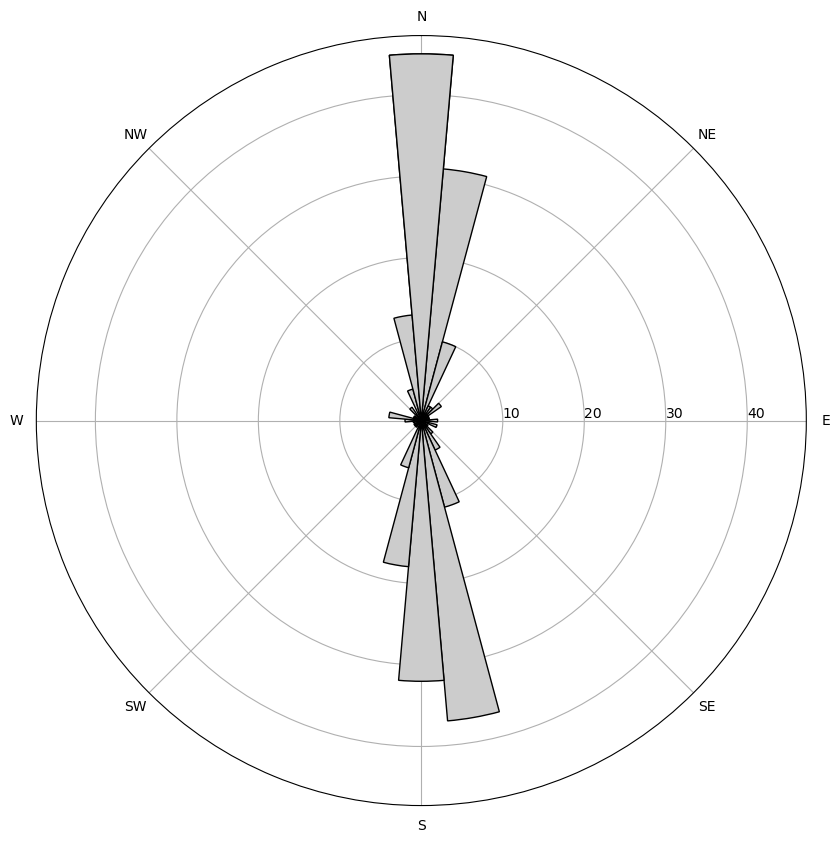

In [17]:
# Sample wind data (directions in degrees)
dip_azs = np.array([30, 45, 60, 75, 120, 150, 180, 200, 220, 250])

def rose_diagram(azimuths):

    # Create a histogram of azimuths
    frequency, bins = np.histogram(azimuths, bins=np.arange(0, 361, 10))

    # Create a polar plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)

    # Plot the rose grid
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

    # Plot the bars representing azimuth frequencies
    ax.bar(
        np.deg2rad(bins), 
        np.append(frequency, frequency[0]), 
        width=np.deg2rad(10), 
        bottom=0.0, 
        color='.8',
        edgecolor='k',
        zorder=10
    )

In [ ]:
fig = rose_diagram(fractures.dip_az.values)
